<a href="https://colab.research.google.com/github/derewor/Genetics-Project/blob/main/Notebook/EMS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=20b8cb251a5e302ad8d7dee4275a8b75f5e6c10d1eb40923561a7c049fa6865c
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
import numpy as np
import pandas as pd
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import sqlalchemy as sa

In [5]:
#emsline7d = pd.read_csv('/content/emsline7d.csv')
emsline17j = pd.read_csv('/content/emsline17j.csv')
#emsline13j = pd.read_csv('/content/emsline13j.csv')
emsline21h = pd.read_csv('/content/emsline21h.csv')
chrom2_sequence = pd.read_csv('/content/DNA sequence chr2.csv')
chrom5_coordinate = pd.read_csv('/content/chrom 5 coordinates.csv')
chrom2_coordinate = pd.read_excel('/content/chrom2 coordinates.xlsx')

In [6]:
chrom2_coordinate.head()

,gene_code,chrom_no,strand,gene_part,gene_pos_start,gene_pos_stop,type,floor_gene_start,ceiling_gene_stop
0,AT2G25790.1,chr2,W,Exon,11000631,11004031,gene,11000630,11004040
1,AT2G25800.1,chr2,C,Exon,11006138,11009728,gene,11006130,11009730
2,AT2TE47440,chr2,C,Exon,11010073,11010228,gene,11010070,11010230
3,AT2TE47445,chr2,W,Exon,11011138,11011335,gene,11011130,11011340
4,AT2G25810.1,chr2,W,Exon,11012658,11013906,gene,11012650,11013910


In [29]:
# remove the Unnamed columns with no information.
chr5_coord = chrom5_coordinate.drop(columns=chrom5_coordinate[['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9',
                                                 'Unnamed: 10','Unnamed: 11','Unnamed: 12']])
chr5_coord.head()

,gene_code,chromosome,strand,gene_part,gene_start_pos,gene_stop_pos
0,AT5G42520.1,chr5,W,Exon,17001287,17002466
1,AT5G42520.2,chr5,W,Exon,17001287,17002466
2,AT5G42520.3,chr5,W,Exon,17001618,17002466
3,AT5TE61365,chr5,C,Exon,17002626,17002869
4,AT5TE61370,chr5,W,Exon,17002870,17003512


In [43]:
# floor the gene start and gene stop positions
chr5_coord['type'] = np.where(chr5_coord['gene_part']=='Exon', 'gene', 'non_gene')
chr5_coord['floor_start_pos'] = (np.floor(chr5_coord['gene_start_pos'] / 10) * 10).astype(int)
chr5_coord['floor_stop_pos'] = (np.ceil(chr5_coord['gene_stop_pos']/10)*10).astype(int)
chr5_coord.head()


,gene_code,chromosome,strand,gene_part,gene_start_pos,gene_stop_pos,floor_start_pos,floor_stop_pos,type
0,AT5G42520.1,chr5,W,Exon,17001287,17002466,17001280,17002470,gene
1,AT5G42520.2,chr5,W,Exon,17001287,17002466,17001280,17002470,gene
2,AT5G42520.3,chr5,W,Exon,17001618,17002466,17001610,17002470,gene
3,AT5TE61365,chr5,C,Exon,17002626,17002869,17002620,17002870,gene
4,AT5TE61370,chr5,W,Exon,17002870,17003512,17002870,17003520,gene


In [8]:
chrom2_sequence.head()

,pos_start,10er,20er,30er,40er,50er,60er,pos_end
0,11000000,CAGCCGGTGA,TTCAACTAAT,TCAATTCGGA,AAAGAGAAAA,TTATATAACA,ACGTAAACAA,11000060
1,11000061,CATTCTTACT,TTGTGTTTTG,AGGGTAAACA,AATTAGTTTT,TGTTCTAGTT,CATAATCTAA,11000120
2,11000121,AGAACGATTT,TTGTTTAACA,AATGCTTAAT,TCAATATTAT,TTTTCTTTAT,ATTTTTACTG,11000180
3,11000181,AATAATATCT,ATATTAAATA,AATCAGCCAT,AATTTAAGGT,GCCAAAGTGC,TCGACACCTT,11000240
4,11000241,TTTTGTTTCT,TTCTATTTTA,AAATTTAAAC,TTTGGTAATA,TTCCCCTTTT,TGTAGCCCAT,11000300


In [9]:
sql_query = 'SELECT * FROM emsline17j LIMIT 5'

In [45]:
result = ps.sqldf(sql_query)
result = pd.DataFrame(result)
result

,chromosome,position,reference_seq,alternative_seq,deep_seq_num,indel_pres
0,Chr1,6324,TAAAA,TAAAAA,71,TRUE
1,Chr1,20509,AATATATATATATATATATATAT,AATATATATATATATATATAT,52,TRUE
2,Chr1,41360,TTATATATATATATATATATATATAT,TTATATATATATATATATATATATATAT,38,TRUE
3,Chr1,59214,C,A,36,.
4,Chr1,87880,C,T,59,.


In [48]:
# Mutations in chromosome 2 and 5 are responsible for rescuing the phenotype as per the ssadh phenotyping.
line17j_selected = "SELECT * FROM emsline17j WHERE chromosome IN ('Chr2', 'Chr5')"
line17j_chr2_5 = ps.sqldf(line17j_selected, locals())
line17j_chr2_5.head()

,chromosome,position,reference_seq,alternative_seq,deep_seq_num,indel_pres
0,Chr2,1000,N,A,1,.
1,Chr2,1033,C,T,13,.
2,Chr2,1966,A,G,7275,.
3,Chr2,2019,T,C,4181,.
4,Chr2,2111,A,G,214,.


In [49]:
# Mutations in chromosome 2 and 5 are responsible for rescuing the phenotype as per the ssadh phenotyping.
line21h_selected = "SELECT * FROM emsline21h WHERE chromosome IN ('Chr2', 'Chr5')"
line21h_chr2_5 = ps.sqldf(line21h_selected, locals())

In [51]:
# The positions value contain some date formats which needs to be cleaned before the analysis.
# This can be done using SQL codes
clean_line17j = "SELECT *, REPLACE(REPLACE(position,'-',''),'/','') AS clean_position FROM line17j_chr2_5"
clean_17j = ps.sqldf(clean_line17j, locals())
clean_line21h = "SELECT *, REPLACE(REPLACE(position,'-',''),'/','') AS clean_position FROM line21h_chr2_5"
clean_21h = ps.sqldf(clean_line21h, locals())

In [56]:
clean_17j.head()

,chromosome,position,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
0,Chr2,1000,N,A,1,.,1000
1,Chr2,1033,C,T,13,.,1033
2,Chr2,1966,A,G,7275,.,1966
3,Chr2,2019,T,C,4181,.,2019
4,Chr2,2111,A,G,214,.,2111


In [52]:
# The pcr based qtl analysis suggested that mutations that rescued the ssadh phenotype are located in the
# lower arms of chromosme 2 and 5. So, I subsetted the data contained in chromosome 2 and 5
# subsetting of chromosome 2 an 5 data from both lines
line17j_chr2 = clean_17j[clean_17j['chromosome']=='Chr2']
line17j_chr5 = clean_17j[clean_17j['chromosome']=='Chr5']
line21h_chr2 = clean_21h[clean_21h['chromosome']=='Chr2']
line21h_chr5 = clean_21h[clean_21h['chromosome']=='Chr5']

In [61]:
# the clean position has a data type format object. This need to be converted to integers
line17j_chr2['clean_position'] =line17j_chr2.loc[:,'clean_position'].astype(int)
line17j_chr5['clean_position'] =line17j_chr5.loc[:,'clean_position'].astype(int)
line21h_chr2['clean_position'] =line21h_chr2.loc[:,'clean_position'].astype(int)
line21h_chr5['clean_position'] =line21h_chr5.loc[:,'clean_position'].astype(int)

<ipython-input-61-1c793d285067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line17j_chr2['clean_position'] =line17j_chr2.loc[:,'clean_position'].astype(int)
<ipython-input-61-1c793d285067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line17j_chr5['clean_position'] =line17j_chr5.loc[:,'clean_position'].astype(int)
<ipython-input-61-1c793d285067>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [62]:
# the mutations position between 11000000 and 13000000 in chr2 and between 17000000 and 19000000 in chro5.
line17j_chr2_target = line17j_chr2[(line17j_chr2['clean_position']> 11000000) & (line17j_chr2['clean_position']<13000000)]
line17j_chr5_target = line17j_chr5[(line17j_chr5['clean_position']> 17000000) & (line17j_chr5['clean_position']<19000000)]
line21h_chr2_target = line21h_chr2[(line21h_chr2['clean_position']> 11000000) & (line21h_chr2['clean_position']<13000000)]
line21h_chr5_target = line21h_chr5[(line21h_chr5['clean_position']> 17000000) & (line21h_chr5['clean_position']<19000000)]

In [63]:
line17j_chr2_target.head()

,chromosome,position,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1544,Chr2,11002492,C,T,71,.,11002492
1545,Chr2,11017525,A,C,62,.,11017525
1546,Chr2,11038939,TA,T,50,TRUE,11038939
1547,Chr2,11038940,A,"T,G",7,.,11038940
1548,Chr2,11041565,G,A,37,.,11041565


In [197]:
# The depth of sequencing is an important factor to determine the reliability of the sequencing result. For the whole
# genome sequencing (WGS), at least 30X the sequence needs to be observed. So, a 30X cutoff point is used to screen
# reliable mutations
line17j_chr2_target_seq = line17j_chr2_target[line17j_chr2_target['deep_seq_num'] >= 30]
line17j_chr5_target_seq = line17j_chr5_target[line17j_chr5_target['deep_seq_num'] >= 30]
line21h_chr2_target_seq = line21h_chr2_target[line21h_chr2_target['deep_seq_num'] >= 30]
line21h_chr5_target_seq = line21h_chr5_target[line21h_chr5_target['deep_seq_num'] >= 30]

In [198]:
df1_17j_chr2 = pd.DataFrame(line17j_chr2_target_seq)
df2_17j_chr5 = pd.DataFrame(line17j_chr5_target_seq)
df3_21h_chr2 = pd.DataFrame(line21h_chr2_target_seq)
df4_21h_chr5 = pd.DataFrame(line21h_chr5_target_seq)

In [199]:
# drop the original position columns
df1_17j_chr2 = df1_17j_chr2.drop(columns='position')
df2_17j_chr5 = df2_17j_chr5.drop(columns='position')
df3_21h_chr2 = df3_21h_chr2.drop(columns='position')
df4_21h_chr5 = df4_21h_chr5.drop(columns='position')

# SEQUENCE CHARACTRIZATION OF CHROMOSOME 2 OF LINE 17J  

In [76]:
df1_17j_chr2.head(2)

,chromosome,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1544,Chr2,C,T,71,.,11002492
1545,Chr2,A,C,62,.,11017525


In [85]:
# How many mutations have been found within the target region? how many are SNP and how many are INDELs
df1_17j_chr2_filtered = df1_17j_chr2[df1_17j_chr2['reference_seq']!='N']
def replace_value(val):
  if val == '.':
    return 'SNP'
  else:
    return 'INDEL'
df1_17j_chr2_filtered['indel_pres'] = df1_17j_chr2_filtered['indel_pres'].apply(replace_value)
# The total number of mutations in the region
total_num_mutations = df1_17j_chr2_filtered.shape[0]
print(total_num_mutations)


73


<ipython-input-85-bfc4f500f2ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_17j_chr2_filtered['indel_pres'] = df1_17j_chr2_filtered['indel_pres'].apply(replace_value)


In [84]:
# The total number of SNP and INDEL
SNP_AND_INDEL = df1_17j_chr2_filtered.groupby('indel_pres')['reference_seq'].count().reset_index()
SNP_AND_INDEL.columns =['mutation_type', 'count_mutations']
SNP_AND_INDEL

,mutation_type,count_mutations
0,INDEL,30
1,SNP,43


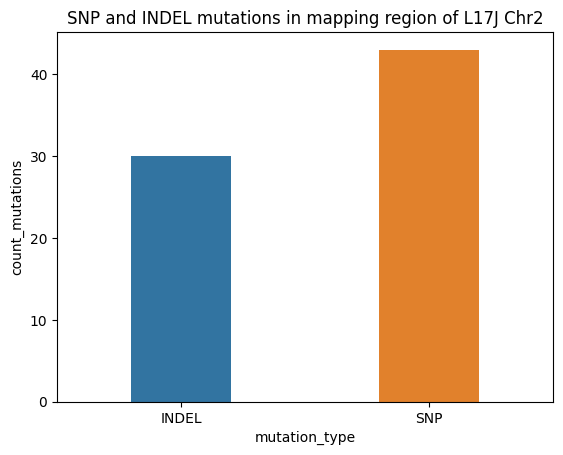

In [86]:
sns.barplot(x='mutation_type', y='count_mutations', hue='mutation_type',width=0.4, data=SNP_AND_INDEL)
plt.title('SNP and INDEL mutations in mapping region of L17J Chr2')
plt.show()

In [87]:
df1_17j_chr2_filtered.head()

,chromosome,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1544,Chr2,C,T,71,SNP,11002492
1545,Chr2,A,C,62,SNP,11017525
1546,Chr2,TA,T,50,INDEL,11038939
1548,Chr2,G,A,37,SNP,11041565
1549,Chr2,ATTTTTTTTTTTT,ATTTTTTTTTTTTT,47,INDEL,11066190


In [79]:
df1_17j_chr2_SNP = df1_17j_chr2_filtered[df1_17j_chr2_filtered['indel_pres']=='SNP']
df1_17j_chr2_SNP.head(2)

,chromosome,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1544,Chr2,C,T,71,SNP,11002492
1545,Chr2,A,C,62,SNP,11017525


In [174]:
SNP_merged_query = "SELECT sn.clean_position, sn.reference_seq, sn.alternative_seq, cc.gene_code, cc.strand, cc.type, cc.gene_pos_start, \
                    cc.gene_pos_stop \
                    FROM df1_17j_chr2_SNP sn LEFT JOIN chrom2_coordinate cc ON sn.clean_position > cc.gene_pos_start \
                    AND sn.clean_position < cc.gene_pos_stop"
SNP_merged = ps.sqldf(SNP_merged_query, locals())
SNP_merged.head()

,clean_position,reference_seq,alternative_seq,gene_code,strand,type,gene_pos_start,gene_pos_stop
0,11002492,C,T,AT2G25790.1,W,gene,11000631.0,11004031.0
1,11017525,A,C,None,None,None,NaN,NaN
2,11041565,G,A,AT2TE47595,C,gene,11041547.0,11041585.0
3,11162058,C,A,AT2G26220.2,W,gene,11159481.0,11162392.0
4,11162058,C,A,AT2G26220.1,W,gene,11159507.0,11162390.0


In [175]:
SNP_merged['gene_id'] = SNP_merged['gene_code'].str.split('.').str[0]
SNP_merged = SNP_merged.drop(columns='gene_code')

In [176]:
SNP_merged.head()

,clean_position,reference_seq,alternative_seq,strand,type,gene_pos_start,gene_pos_stop,gene_id
0,11002492,C,T,W,gene,11000631.0,11004031.0,AT2G25790
1,11017525,A,C,None,None,NaN,NaN,None
2,11041565,G,A,C,gene,11041547.0,11041585.0,AT2TE47595
3,11162058,C,A,W,gene,11159481.0,11162392.0,AT2G26220
4,11162058,C,A,W,gene,11159507.0,11162390.0,AT2G26220


In [177]:
# some mutations seem duplicates and the genes seem differetn veriosn of the same type.
snp_merged_cleaned = SNP_merged.drop_duplicates()
print(SNP_merged.shape)
print(snp_merged_cleaned.shape)

(66, 8)
(51, 8)


In [178]:
snp_merged_cleaned.head()

,clean_position,reference_seq,alternative_seq,strand,type,gene_pos_start,gene_pos_stop,gene_id
0,11002492,C,T,W,gene,11000631.0,11004031.0,AT2G25790
1,11017525,A,C,None,None,NaN,NaN,None
2,11041565,G,A,C,gene,11041547.0,11041585.0,AT2TE47595
3,11162058,C,A,W,gene,11159481.0,11162392.0,AT2G26220
4,11162058,C,A,W,gene,11159507.0,11162390.0,AT2G26220


In [179]:
# The number of mutations per gene is variable. How many mutations occured per gene?
mutations_per_gene = snp_merged_cleaned.groupby('gene_id')['reference_seq'].count().reset_index()
mutations_per_gene = pd.DataFrame(mutations_per_gene)
mutations_per_gene.columns = ['gene_id','num_mutations']
mutations_per_gene


,gene_id,num_mutations
0,AT2G25790,1
1,AT2G26220,3
2,AT2G26260,2
3,AT2G26350,4
4,AT2G26610,1
5,AT2G26780,1
6,AT2G26930,1
7,AT2G27730,1
8,AT2G28070,1
9,AT2G28290,1


<ipython-input-180-f500e3389c5b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')


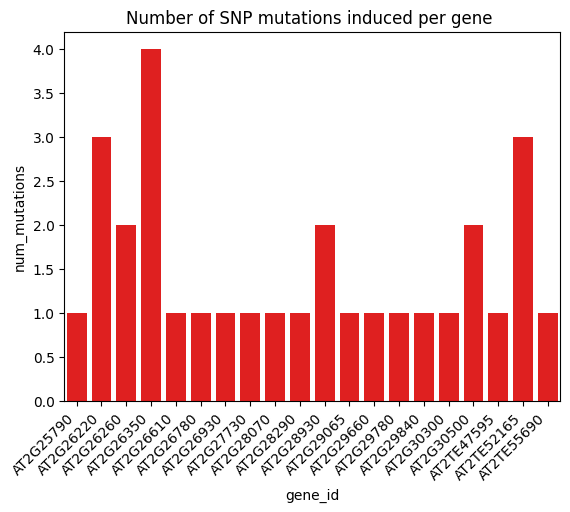

In [180]:
# show the distribution of mutation with bargraph
g = sns.barplot(data=mutations_per_gene, x='gene_id', y='num_mutations', color='red')
plt.title('Number of SNP mutations induced per gene ')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
plt.show(g)

In [182]:
# The number of mutations within genes and strand type. The watson(W) and crick(C) strands
gene_per_strand = SNP_merged.groupby('strand')['type'].count()
gene_per_strand

,type
strand,
C,21
W,24


In [183]:
# Indels in the mapping region on chromosome 2 of line 17J
df2_17j_chr2_INDEL = df1_17j_chr2_filtered[df1_17j_chr2_filtered['indel_pres']=='INDEL']
df2_17j_chr2_INDEL.head()

,chromosome,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position
1546,Chr2,TA,T,50,INDEL,11038939
1549,Chr2,ATTTTTTTTTTTT,ATTTTTTTTTTTTT,47,INDEL,11066190
1550,Chr2,CATATATATATATATATATATATAT,CATATATATATATATATATATAT,54,INDEL,11080923
1552,Chr2,AATATATATATATATATATATAT,AATATATATATATATATATAT,49,INDEL,11101332
1555,Chr2,CATATATATATATATATATATATA,CATATATATATATATATATATA,42,INDEL,11175260


In [184]:
# what is the number of nucleotide insertions or delitions in the genome?
df2_17j_chr2_INDEL['size_indel'] = df2_17j_chr2_INDEL['alternative_seq'].str.len() - \
                                   df2_17j_chr2_INDEL['reference_seq'].str.len()
df2_17j_chr2_INDEL.head()

<ipython-input-184-78b145845922>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_17j_chr2_INDEL['size_indel'] = df2_17j_chr2_INDEL['alternative_seq'].str.len() - \


,chromosome,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position,size_indel
1546,Chr2,TA,T,50,INDEL,11038939,-1
1549,Chr2,ATTTTTTTTTTTT,ATTTTTTTTTTTTT,47,INDEL,11066190,1
1550,Chr2,CATATATATATATATATATATATAT,CATATATATATATATATATATAT,54,INDEL,11080923,-2
1552,Chr2,AATATATATATATATATATATAT,AATATATATATATATATATAT,49,INDEL,11101332,-2
1555,Chr2,CATATATATATATATATATATATA,CATATATATATATATATATATA,42,INDEL,11175260,-2


In [185]:
# assigning a value if the mutation is insertion or deletion
def assign(row):
  size_indel = row['size_indel']
  if size_indel > 0:
    return 'INSERT'
  else:
    return 'DELETION'
df2_17j_chr2_INDEL['INDEL'] = df2_17j_chr2_INDEL.apply(assign, axis=1)

<ipython-input-185-24f590fda1f5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_17j_chr2_INDEL['INDEL'] = df2_17j_chr2_INDEL.apply(assign, axis=1)


In [186]:
df2_17j_chr2_INDEL.head()

,chromosome,reference_seq,alternative_seq,deep_seq_num,indel_pres,clean_position,size_indel,INDEL
1546,Chr2,TA,T,50,INDEL,11038939,-1,DELETION
1549,Chr2,ATTTTTTTTTTTT,ATTTTTTTTTTTTT,47,INDEL,11066190,1,INSERT
1550,Chr2,CATATATATATATATATATATATAT,CATATATATATATATATATATAT,54,INDEL,11080923,-2,DELETION
1552,Chr2,AATATATATATATATATATATAT,AATATATATATATATATATAT,49,INDEL,11101332,-2,DELETION
1555,Chr2,CATATATATATATATATATATATA,CATATATATATATATATATATA,42,INDEL,11175260,-2,DELETION


In [187]:
# there are more than 2 fold deletions than insertions.
num_indel = df2_17j_chr2_INDEL.groupby('INDEL')['reference_seq'].count().reset_index()
num_indel = pd.DataFrame(num_indel)
num_indel.columns = ['INDEL', 'num_indels']
num_indel

,INDEL,num_indels
0,DELETION,21
1,INSERT,9


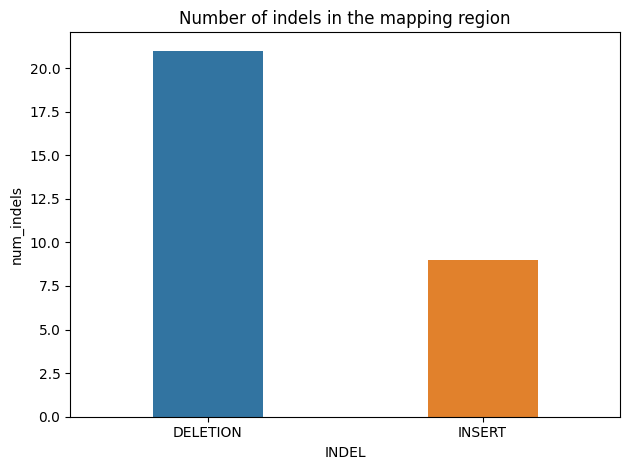

In [188]:
sns.barplot(data=num_indel, x='INDEL', y='num_indels', hue='INDEL', width=0.4)
plt.title('Number of indels in the mapping region')
plt.tight_layout()
plt.show()

In [192]:
# In which genes the indel occured?
INDEL_merged_query = "SELECT ind.clean_position, ind.reference_seq, ind.alternative_seq, cc.type, cc.gene_code, cc.strand, cc.gene_pos_start, \
                             cc.gene_pos_stop \
                      FROM df2_17j_chr2_INDEL ind \
                         LEFT JOIN chrom2_coordinate cc ON ind.clean_position > cc.gene_pos_start \
                              AND ind.clean_position < cc.gene_pos_stop"
INDEL_merged = ps.sqldf(INDEL_merged_query, locals())
print(INDEL_merged.shape)
INDEL_merged.head()

(31, 8)


,clean_position,reference_seq,alternative_seq,type,gene_code,strand,gene_pos_start,gene_pos_stop
0,11038939,TA,T,None,None,None,NaN,NaN
1,11066190,ATTTTTTTTTTTT,ATTTTTTTTTTTTT,None,None,None,NaN,NaN
2,11080923,CATATATATATATATATATATATAT,CATATATATATATATATATATAT,gene,AT2TE47785,W,11080914.0,11081235.0
3,11101332,AATATATATATATATATATATAT,AATATATATATATATATATAT,gene,AT2TE47895,W,11101222.0,11102213.0
4,11175260,CATATATATATATATATATATATA,CATATATATATATATATATATA,None,None,None,NaN,NaN


In [191]:
# how many indel occured in a gene? Out of 31 indels, only 11 are occured in genic region.
indel_in_genes = INDEL_merged.groupby('type')['gene_code'].count()
indel_in_genes

,gene_code
type,
gene,11


In [195]:
# Out of 11 mutation 7 occured with in transposable element encoding genes. Only four are with in protein codign genes.
genic_indels = INDEL_merged[INDEL_merged['type'].notna()]
genic_indels['gene_id'] = genic_indels['gene_code'].str.split('.').str[0]
genic_indels

<ipython-input-195-74356eeaf9b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genic_indels['gene_id'] = genic_indels['gene_code'].str.split('.').str[0]


,clean_position,reference_seq,alternative_seq,type,gene_code,strand,gene_pos_start,gene_pos_stop,gene_id
2,11080923,CATATATATATATATATATATATAT,CATATATATATATATATATATAT,gene,AT2TE47785,W,11080914.0,11081235.0,AT2TE47785
3,11101332,AATATATATATATATATATATAT,AATATATATATATATATATAT,gene,AT2TE47895,W,11101222.0,11102213.0,AT2TE47895
5,11350676,GTATATATATATATATATATATAT,GTATATATATATATATATATAT,gene,AT2G26690.1,C,11347347.0,11350916.0,AT2G26690
6,11350676,GTATATATATATATATATATATAT,GTATATATATATATATATATAT,gene,AT2G26692.1,W,11350517.0,11351293.0,AT2G26692
8,11522656,GTATATATATATATATATA,GTATATATATATATATA,gene,AT2TE49950,C,11522543.0,11523084.0,AT2TE49950
13,11891541,GTATATATATATATATATATATATATATAT,GTATATATATATATATATATATATATAT,gene,AT2TE51750,C,11891453.0,11891938.0,AT2TE51750
17,12073691,TTATATATATATATATATATATATATATAT,TTATATATATATATATATATATATATAT,gene,AT2TE52590,C,12073563.0,12073977.0,AT2TE52590
23,12739079,GAA,GAAA,gene,AT2TE55690,C,12738687.0,12740291.0,AT2TE55690
25,12812804,GGAGAGAGAGAGAGAGAG,GGAGAGAGAGAGAGAG,gene,AT2TE56035,C,12812787.0,12813045.0,AT2TE56035
26,12845233,AATATATATATATATATAT,AATATATATATATATAT,gene,AT2G30090.1,C,12843583.0,12845597.0,AT2G30090
